In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
covid_df = pd.read_csv('COVID-19_Sentiments.csv')
covid_df.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [4]:
covid_df.shape

(648958, 5)

In [5]:
if covid_df.duplicated().any():
    print('Duplicates Found')
else:    
    print('No Duplicates Found')

Duplicates Found


In [6]:
covid_df = covid_df.drop_duplicates().reset_index(drop=True)

In [7]:
covid_df.shape

(324172, 5)

In [8]:
covid_df.isna().sum()

Text_Id          0
Text             0
Date             0
Location         0
Sentiments    5072
dtype: int64

In [9]:
covid_df.Sentiments.fillna(covid_df['Sentiments'].mean(),inplace=True)

In [10]:
covid_df.isna().sum()

Text_Id       0
Text          0
Date          0
Location      0
Sentiments    0
dtype: int64

In [11]:
covid_df.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [12]:
covid_df.Sentiments.value_counts()

 0.000000    129729
 0.500000     11787
 0.200000      8184
 0.100000      6980
 0.250000      6671
              ...  
-0.024167         1
 0.259259         1
-0.163095         1
 0.109984         1
 0.129762         1
Name: Sentiments, Length: 6311, dtype: int64

In [13]:
def response(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else :
        return 0
covid_df['Sentiments'] = covid_df['Sentiments'].apply(response)

In [14]:
covid_df.Sentiments.value_counts()


 1    134107
 0    129729
-1     60336
Name: Sentiments, dtype: int64

In [15]:
covid_df.head(10)

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",1
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",1
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0
5,1241032877107642368,RT @narendramodi: Explosive batsmen who've see...,Fri Mar 20 16:04:29 +0000 2020,India,0
6,1241032873060294656,RT @gkd600: No more spreading Rumors. This is ...,Fri Mar 20 16:04:28 +0000 2020,India,-1
7,1241032874087682048,RT @bainjal: That son of a top official in Wes...,Fri Mar 20 16:04:29 +0000 2020,"New Delhi, INDIA",1
8,1241032869096460288,RT @amitandon: Corona has proven that India's ...,Fri Mar 20 16:04:27 +0000 2020,"Pune, Maharashtra, India",-1
9,1241032869675290624,RT @Dt_Ritika: Being a cancer patient i am sca...,Fri Mar 20 16:04:28 +0000 2020,Chennai,0


In [16]:
covid_df.drop(['Text_Id', 'Date', 'Location'], axis =1, inplace = True)

In [17]:
covid_df = covid_df[covid_df.Sentiments != 0]

In [18]:
covid_df.head()

,Text,Sentiments
2,"RT @SmokingSkills_: Daughter of an IAS, son of...",1
3,RT @narendramodi: The young actors have someth...,1
6,RT @gkd600: No more spreading Rumors. This is ...,-1
7,RT @bainjal: That son of a top official in Wes...,1
8,RT @amitandon: Corona has proven that India's ...,-1


In [19]:
import string
string.punctuation

def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    return words_wo_punct
covid_df["Text_wo_punct"] = covid_df['Text'].apply(lambda x: remove_punctuation(x))
covid_df.head()

,Text,Sentiments,Text_wo_punct
2,"RT @SmokingSkills_: Daughter of an IAS, son of...",1,RT SmokingSkills Daughter of an IAS son of a K...
3,RT @narendramodi: The young actors have someth...,1,RT narendramodi The young actors have somethin...
6,RT @gkd600: No more spreading Rumors. This is ...,-1,RT gkd600 No more spreading Rumors This is the...
7,RT @bainjal: That son of a top official in Wes...,1,RT bainjal That son of a top official in West ...
8,RT @amitandon: Corona has proven that India's ...,-1,RT amitandon Corona has proven that Indias bi...


In [20]:
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\w+') 
covid_df['Text_wo_punct'] = covid_df['Text_wo_punct'].apply(lambda x: tokenizer.tokenize(x.lower()))
covid_df.head()

,Text,Sentiments,Text_wo_punct
2,"RT @SmokingSkills_: Daughter of an IAS, son of...",1,"[rt, smokingskills, daughter, of, an, ias, son..."
3,RT @narendramodi: The young actors have someth...,1,"[rt, narendramodi, the, young, actors, have, s..."
6,RT @gkd600: No more spreading Rumors. This is ...,-1,"[rt, gkd600, no, more, spreading, rumors, this..."
7,RT @bainjal: That son of a top official in Wes...,1,"[rt, bainjal, that, son, of, a, top, official,..."
8,RT @amitandon: Corona has proven that India's ...,-1,"[rt, amitandon, corona, has, proven, that, ind..."


In [21]:
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
remove = ['i','a','d','o','y']
stop = [ele for ele in stop if ele not in remove ]
print(len(stop))

def remove_stopwords(text):
    words = [words for words in text if words not in stop]
    return words
covid_df['Text_wo_punct_wo_sw'] = covid_df['Text_wo_punct'].apply(lambda x: remove_stopwords(x))
covid_df.head()

174


,Text,Sentiments,Text_wo_punct,Text_wo_punct_wo_sw
2,"RT @SmokingSkills_: Daughter of an IAS, son of...",1,"[rt, smokingskills, daughter, of, an, ias, son...","[rt, smokingskills, daughter, ias, son, a, kol..."
3,RT @narendramodi: The young actors have someth...,1,"[rt, narendramodi, the, young, actors, have, s...","[rt, narendramodi, young, actors, something, s..."
6,RT @gkd600: No more spreading Rumors. This is ...,-1,"[rt, gkd600, no, more, spreading, rumors, this...","[rt, gkd600, spreading, rumors, official, webs..."
7,RT @bainjal: That son of a top official in Wes...,1,"[rt, bainjal, that, son, of, a, top, official,...","[rt, bainjal, son, a, top, official, west, ben..."
8,RT @amitandon: Corona has proven that India's ...,-1,"[rt, amitandon, corona, has, proven, that, ind...","[rt, amitandon, corona, proven, indias, bigger..."


In [23]:
import nltk
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
def lemmatise(text):
    lem_text = ' '.join([lemm.lemmatize(words) for words in text])
    return lem_text
covid_df['Final_Text'] = covid_df['Text_wo_punct_wo_sw'].apply(lambda x: lemmatise(x))
covid_df

[nltk_data] Downloading package omw-1.4 to C:\Users\Rajalakshmi K
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


,Text,Sentiments,Text_wo_punct,Text_wo_punct_wo_sw,Final_Text
2,"RT @SmokingSkills_: Daughter of an IAS, son of...",1,"[rt, smokingskills, daughter, of, an, ias, son...","[rt, smokingskills, daughter, ias, son, a, kol...",rt smokingskills daughter ia son a kolkata off...
3,RT @narendramodi: The young actors have someth...,1,"[rt, narendramodi, the, young, actors, have, s...","[rt, narendramodi, young, actors, something, s...",rt narendramodi young actor something say time...
6,RT @gkd600: No more spreading Rumors. This is ...,-1,"[rt, gkd600, no, more, spreading, rumors, this...","[rt, gkd600, spreading, rumors, official, webs...",rt gkd600 spreading rumor official website cor...
7,RT @bainjal: That son of a top official in Wes...,1,"[rt, bainjal, that, son, of, a, top, official,...","[rt, bainjal, son, a, top, official, west, ben...",rt bainjal son a top official west bengal amp ...
8,RT @amitandon: Corona has proven that India's ...,-1,"[rt, amitandon, corona, has, proven, that, ind...","[rt, amitandon, corona, proven, indias, bigger...",rt amitandon corona proven india bigger proble...
...,...,...,...,...,...
324167,Shame on such *Danveer Karna* \nWhom they wan...,1,"[shame, on, such, danveer, karna, whom, they, ...","[shame, danveer, karna, want, show, photoop, m...",shame danveer karna want show photoop make poo...
324168,"RT @Nagrika: ""This comic is a take on how citi...",1,"[rt, nagrika, this, comic, is, a, take, on, ho...","[rt, nagrika, comic, a, take, cities, might, c...",rt nagrika comic a take city might change cope...
324169,@arroworks We have to deal with it and live wi...,1,"[arroworks, we, have, to, deal, with, it, and,...","[arroworks, deal, live, point, caution, wear, ...",arroworks deal live point caution wear mask ma...
324170,RT @stpiindia: #STPIPulse: Watch live Dr. @Gan...,1,"[rt, stpiindia, stpipulse, watch, live, dr, ga...","[rt, stpiindia, stpipulse, watch, live, dr, ga...",rt stpiindia stpipulse watch live dr ganeshnat...


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(covid_df.Final_Text, covid_df.Sentiments, test_size = 0.3, random_state = 1)

In [25]:
good = x_train[y_train[y_train == 1].index]
#neutral = x_train[y_train[y_train == 0].index]
bad = x_train[y_train[y_train == -1].index]

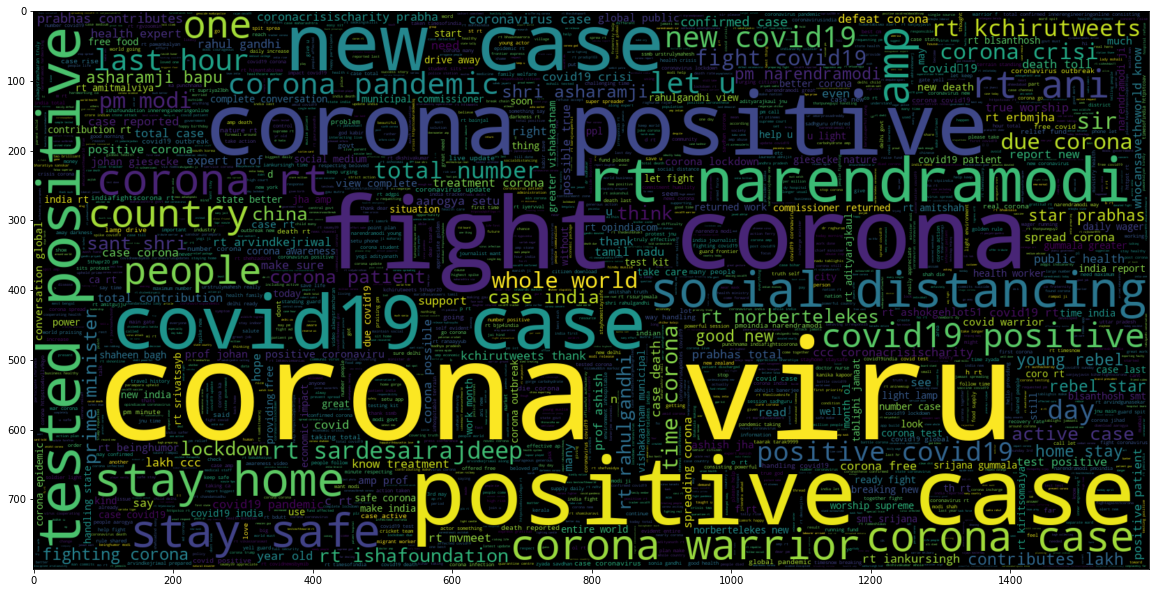

In [27]:
from wordcloud import WordCloud


plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))

plt.imshow(wc,interpolation = 'bilinear')

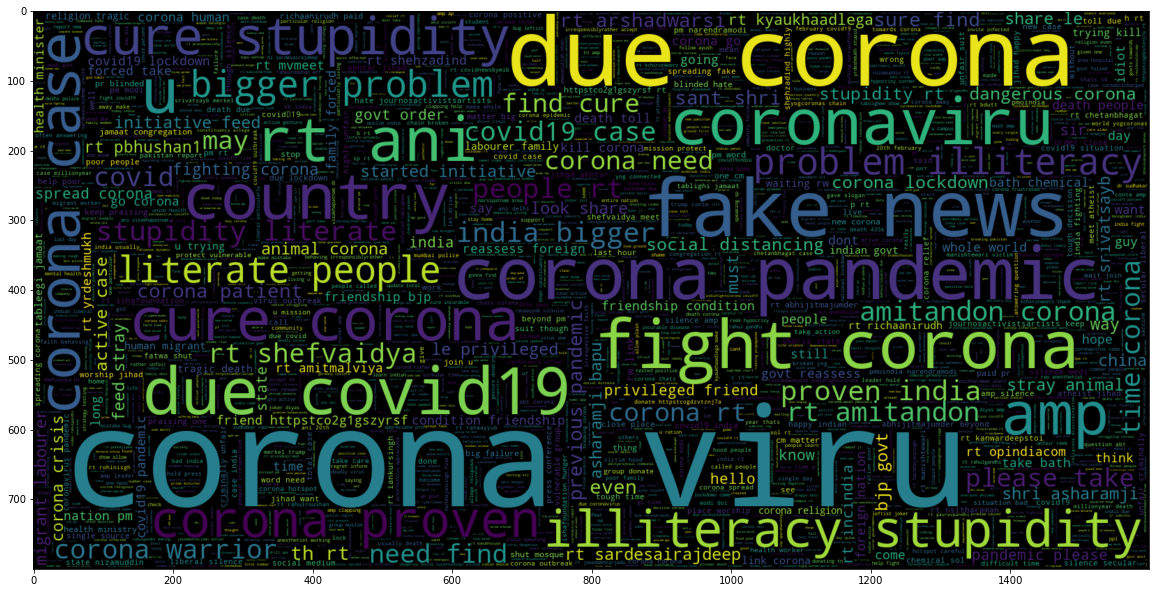

In [28]:
plt.figure(figsize = (20,20))
wc = WordCloud(min_font_size = 3, max_words = 3000, width = 1600, height = 800).generate(" ".join(bad))
plt.imshow(wc, interpolation = 'bilinear')

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(136110,)
(58333,)
(136110,)
(58333,)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
obj = TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
obj_xtrain = obj.fit_transform(x_train)
obj_xtest = obj.transform(x_test)
print(obj_xtrain.shape)
print(obj_xtest.shape)

(136110, 1288040)
(58333, 1288040)


In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
lr_tfidf=lr.fit(obj_xtrain,y_train)

In [32]:
#lr_tfidf_predict = lr.predict(obj_xtest)
print(lr.score(obj_xtest,y_test))

0.6902610872062126


In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(obj_xtrain, y_train)

MultinomialNB()

In [34]:
#mnb_tfidf_predict = classifier.predict(obj_xtest)
print(classifier.score(obj_xtest, y_test))

0.7188212504071452


In [35]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(C=0.5, random_state=42)
linear_svc.fit(obj_xtrain, y_train)

print(linear_svc.score(obj_xtest,y_test))

0.7205698318276105
